<a href="https://colab.research.google.com/github/AayeshaIslam/Where-s-My-Water/blob/main/Folium_map_working.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hello! And welcome to our interactive Generative AI project titled **Where's My Water?**
This project aims to address groundwater depletion and use generative AI to visualize and predict trends in groundwater depth in the United States.


**Why This is Important**


*   Water makes up 71% of the Earth, but of the water that's on Earth, **only 3% of it is freshwater**
*   Of the freshwater that is on Earth, 68% of it is frozen, and **only 30% of it is available as groundwater**. This is what we typically rely on for drinking water.
* Human activity, such as sustained groundwater pumping and pollution can affect groundwater availability and groundwater quality. At the rate at which humans are using and treating groundwater, we predict that there **may not be enough groundwater in the future**

**What We're Doing**

*   Our project will first use the Stable Diffusion open source library, which is **supported by the NVIDIA System Management Interface (SMI)** to take in User Input and visualize what lakes and wells look like after groundwater depletion. Visualizing groundwater depletion is difficult, but it is important to note that surface water bodies rely on groundwater to replenish and maintain their water levels. We hope that having the providing visuals for the significance of groundwater depletion will help people realize **the severity of this issue.**
*   Our project will also utilize **USGS groundwater data from 1988 to 2022** to train our AI model to **observe trends in groundwater** for each state in the United States. We plan to create an interactive map and project groundwater trends in the country for future years.





**Visualizing Groundwater Depletion in Surface Water Bodies**

*   The following code utilizes the Stable Diffusion Open Source Library and NVIDIA SMI to generate AI images of wells and lakes experiencing groundwater depletion.




In [2]:
!nvidia-smi #to make this work, go to edit, notebook settings, and then change to gpu

Sun Oct 15 18:33:51 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
!pip install diffusers==0.11.1
!pip install transformers scipy ftfy accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.9/524.9 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.1/258.1 kB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 60.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 63.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 32.8 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.18.0
    Uninstalling huggingface-hub-0.18.0:
      Successfully uninstalled huggingface-hub-0.18.0


In [4]:
import torch
from diffusers import StableDiffusionPipeline
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", torch_dtype=torch.float16)

text_encoder/pytorch_model.fp16.safetensors not found


Fetching 30 files:   0%|          | 0/30 [00:00<?, ?it/s]

The config attributes {'scaling_factor': 0.18215} were passed to AutoencoderKL, but are not expected and will be ignored. Please verify your config.json configuration file.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


In [5]:
pipe = pipe.to("cuda")

In [6]:
val = input("What would you like to visualize? Select A for lake after groundwater depletion or B for  well after groundwater depletion")

KeyboardInterrupt: ignored

  0%|          | 0/50 [00:00<?, ?it/s]

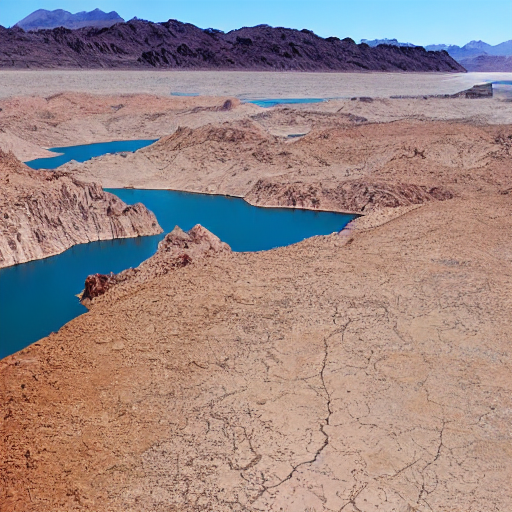

In [ ]:
if (val == 'A'):
    prompt = "Lake Mead after groundwater depletion"
if (val == 'B'):
  prompt = "Well after groundwater depletion"

image = pipe(prompt).images[0]  # image here is in [PIL format](https://pillow.readthedocs.io/en/stable/)

# Now to display an image you can either save it such as:
image.save(f"visual.png")

# or if you're in a google colab you can directly display it with
image

**Training the Model with USGS Data**


*   The following block of code takes in USGS Groundwater Data from 1988 to 2022 and trains the AI Model to recognize patterns in groundwater depth by state and year




The following section is for our Artificial Intelligence Model. We will take in groundwater data by state and year and train our model to predict trends in the groundwater depth.

In [12]:
import pandas as pd

# Load the data from CSV files
state_data = pd.read_csv('/content/state_data - Sheet1.csv')
groundwater_data = pd.read_csv('/content/groundwater_data - Sheet1.csv')

# Extract features and target
X = state_data
y = groundwater_data

# Convert categorical variables to numerical
X = pd.get_dummies(X)

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# TensorFlow and Keras
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.1)

# Evaluate the model
##mse = model.evaluate(X_test_scaled, y_test)
##print(f'Mean Squared Error on test set: {mse}')

FileNotFoundError: ignored

In [ ]:
# Sample testing data
sample_testing_data = pd.DataFrame({
    'State': ['Florida'],
    'Year': [2027]
})

# Convert categorical variables to numerical
sample_X = pd.get_dummies(sample_testing_data)

# Get missing columns in the sample testing data
missing_cols = set(X.columns) - set(sample_X.columns)

# Add the missing columns to the sample testing data
for col in missing_cols:
    sample_X[col] = 0

# Reorder the columns to match the order of the training data
sample_X = sample_X[X.columns]

# Normalize the sample data
sample_X_scaled = scaler.transform(sample_X)

# Predict groundwater levels
sample_predictions = model.predict(sample_X_scaled)

# Print the predicted groundwater levels
for state, prediction in zip(sample_testing_data['State'], sample_predictions):
    print(f"Predicted groundwater level for {state}: {prediction[0]}")

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a more complex model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.1)

# Evaluate the model
#mse = model.evaluate(X_test_scaled, y_test)
#print(f'Mean Squared Error on test set: {mse}')

# Make predictions on sample data
sample_X_scaled = scaler.transform(sample_X)
sample_predictions = model.predict(sample_X_scaled)

# Print the predicted groundwater levels
for state, prediction in zip(sample_testing_data['State'], sample_predictions):
    my_groundwater_prediction = prediction[0]
    my_state = state
    print(f"Predicted groundwater level for {state}: {prediction[0]}")




The following code runs the website

In [13]:
!pip install flask-ngrok
!pip install pyngrok==4.1.1
!ngrok authtoken 2WnzUMGeErcRWbC7GeyRfumn473_645rVdoApCgT1FQd3kyBH

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [9]:
#Import earth engine
import ee

# Trigger the authentication flow.
ee.Authenticate()

# Initialize the library.
ee.Initialize()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=PSVXEvCcCm41DKhovxFNKbQdyVc2F60GTOs8GWOZurA&tc=HnuJVk-CfzoSbGC7IlkAIw2kRd_lWKCqTIbRA4vgyFs&cc=fQCoov6jk00G-3mPTILkWQH1X8vWby0qDfSniI6MEmY

The authorization workflow will generate a code, which you should paste in the box below.
Enter verification code: 4/1AfJohXmZMwl0qSEq7JSz3womqIz1ezYICeYLLmL6FNTHod6NVksYNXllxnk

Successfully saved authorization token.


In [14]:
import folium
import pandas as pd

In [ ]:
from flask import Flask
from flask import Flask, render_template, request
from flask_ngrok import run_with_ngrok
from flask import Flask, render_template_string
from PIL import Image
import io
app = Flask(__name__)
run_with_ngrok(app)

# Define a method for displaying Earth Engine image tiles to folium map.
def add_ee_layer(self, ee_image_object, vis_params, name):
  map_id_dict = ee.Image(ee_image_object).getMapId(vis_params)
  folium.raster_layers.TileLayer(
    tiles = map_id_dict['tile_fetcher'].url_format,
    attr = 'Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>',
    name = name,
    overlay = True,
    control = True
  ).add_to(self)

def ai_implement(year, state_name):


  # Load the data from CSV files
  state_data = pd.read_csv('/content/state_data - Sheet1.csv')
  groundwater_data = pd.read_csv('/content/groundwater_data - Sheet1.csv')

# Extract features and target
  X = state_data
  y = groundwater_data

# Convert categorical variables to numerical
  X = pd.get_dummies(X)

# Split data into training and testing sets
  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
  from sklearn.preprocessing import MinMaxScaler
  scaler = MinMaxScaler()
  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)

# TensorFlow and Keras
  import tensorflow as tf
  from tensorflow import keras

  model = keras.Sequential([
    keras.layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(1)
  ])

  model.compile(optimizer='adam', loss='mean_squared_error')

  model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.1)

# Evaluate the model
  #mse = model.evaluate(X_test_scaled, y_test)
  #print(f'Mean Squared Error on test set: {mse}')

  # Sample testing data
  year_num = int(year)
  sample_testing_data = pd.DataFrame({
      'State': state_name,
      'Year': year
  })

# Convert categorical variables to numerical
  sample_X = pd.get_dummies(sample_testing_data)

# Get missing columns in the sample testing data
  missing_cols = set(X.columns) - set(sample_X.columns)

# Add the missing columns to the sample testing data
  for col in missing_cols:
    sample_X[col] = 0

# Reorder the columns to match the order of the training data
  sample_X = sample_X[X.columns]

# Normalize the sample data
  sample_X_scaled = scaler.transform(sample_X)

# Predict groundwater levels
  sample_predictions = model.predict(sample_X_scaled)

# Print the predicted groundwater levels
  for state, prediction in zip(sample_testing_data['State'], sample_predictions):
    print(f"Predicted groundwater level for {state}: {prediction[0]}")

# Split data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
  scaler = MinMaxScaler()
  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)

# Define a more complex model
  model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
  ])

# Compile the model
  model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
  model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.1)

# Evaluate the model
  #mse = model.evaluate(X_test_scaled, y_test)
  #print(f'Mean Squared Error on test set: {mse}')

# Make predictions on sample data
  sample_X_scaled = scaler.transform(sample_X)
  sample_predictions = model.predict(sample_X_scaled)

  my_groundwater_prediction = 0
# Print the predicted groundwater levels
  for state, prediction in zip(sample_testing_data['State'], sample_predictions):
    my_groundwater_prediction = prediction[0]
    my_state = state
    print(f"Predicted groundwater level for {state}: {prediction[0]}")
  return my_groundwater_prediction

# Display the map.
#display(my_map)
@app.route('/', methods=['GET', 'POST'])
def home():

    fc = ee.FeatureCollection('TIGER/2018/States')
    image = ee.Image().paint(fc, 0, 2)
    # Add EE drawing method to folium.
    folium.Map.add_ee_layer = add_ee_layer

    # Create a folium map object.
    my_map = folium.Map(location=[37.649, -99.844], zoom_start = 4)

    # Add the layer to the map object.
    my_map.add_ee_layer(image, {'palette': '00FFFF'}, 'TIGER/2018/States')

    # Add a layer control panel to the map.
    my_map.add_child(folium.LayerControl())

    # Adds marker to
    data = pd.DataFrame({
        'lon':[-86.902298, -91.831833, -111.093731, -119.417932, -105.782067, -73.087749, -77.033418, -75.52767, -81.515754, -82.907123, -93.097702, -114.742041, -89.398528, -98.484246, -92.145024, -76.641271, -94.6859, -89.398528, -79.0193, -99.901813, -71.572395, -74.405661, -105.032363, -116.419389, -120.554201, -66.590149, -81.163725, -86.580447, -99.901813, -111.093731, -78.656894, -120.740139, -88.787868],
        'lat':[32.318231, 35.20105, 34.048928, 36.778261, 39.550051, 41.603221, 38.905985, 38.910832, 27.664827, 32.157435, 41.878003, 44.068202, 40.633125, 39.011902, 31.244823, 39.045755, 46.729553, 32.354668, 35.759573, 41.492537, 43.193852, 40.058324, 34.97273, 38.80261, 43.804133, 18.220833, 33.836081, 35.517491, 31.968599, 39.32098, 37.431573, 47.751074, 43.78444],
        'name':['Alabama', 'Arkansas', 'Arizona', 'California', 'Colorado', 'Connecticut', 'District of Columbia', 'Delaware','Florida', 'Georgia', 'Iowa', 'Idaho', 'Illinois', 'Kansas', 'Louisiana', 'Maryland', 'Minnesota', 'Mississippi', 'North Carolina', 'Nebraska', 'New Hampshire', 'New Jersey', 'New Mexico', 'Nevada', 'Oregon', 'Puerto Rico', 'South Carolina', 'Tennessee', 'Texas', 'Utah', 'Virginia', 'Washington', 'Wisconsin']
    }, dtype=str)

    data

    for i in range (0, len(data)):
      folium.Marker(
        location=[data.iloc[i]['lat'], data.iloc[i]['lon']],
        popup=data.iloc[i]['name'],
      ).add_to(my_map)

    #Do not add anything for the map ater this point
    my_map.get_root().render()

    #derive the script and style tags to be rendered in HTML head
    header = my_map.get_root().header.render()

    body_html = my_map.get_root().html.render()

    script = my_map.get_root().script.render()

    # Create a folium map object.
    my_second_map = folium.Map(location=[37.649, -99.844], zoom_start = 4)
    #Do not add anything for the map ater this point
    my_second_map.get_root().render()

    #derive the script and style tags to be rendered in HTML head
    header2 = my_second_map.get_root().header.render()

    body_html2 = my_second_map.get_root().html.render()

    script2 = my_second_map.get_root().script.render()

    info = None
    if request.method=='POST':
      year = request.form['year']
      state= request.form['state']
      info = ai_implement(year, state)

      print(info)


    return render_template_string("""
            <!DOCTYPE html>
            <html>
                <head>
                    <title>Where's My Water!</title>
                    {{ header|safe }}
                </head>
                <body class="bg-info text-white">
                <div class="text-center">
                    <h1 class="mt-5"><b>Where's My Water!</b></h1>
                    <h3 class="mb-5">Type below to interact with our chatbot</h3>
                    <form action="/" method="post">
                      <input type="text" id="year" name="year" placeholder="Year" class="mb-5">
                      <input type="text" id="state" name="state" placeholder="State" class="mb-5">
                      <button>Enter</button>
                    </form>
                    {% if info %}
                    {{ info }}
                    {% endif %}
                </div>
                    {{ body_html|safe }}



                    <h3>This map is embeded in a flask server web page !</h3>
                    <script>
                        {{ script|safe }}


                    </script>

                </body>
            </html>
        """,
        header=header,
        body_html=body_html,
        script=script, data=data)

app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
Exception in thread Thread-13:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/urllib3/connection.py", line 203, in _new_conn
    sock = connection.create_connection(
  File "/usr/local/lib/python3.10/dist-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/usr/local/lib/python3.10/dist-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 111] Connection refused

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py", line 790, in urlopen
    response = self._make_request(
  File "/usr/local/lib/python3.10/dist-packages/urll